In [1]:
import pandas as pd
import numpy as np
import datetime
import json
from matplotlib import pyplot as plt
import os
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.colors as colrs
import json
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colrs
from shapely.geometry import shape as Shape
import numpy as np
from descartes.patch import PolygonPatch
import shutil
from shapely.geometry.polygon import Polygon
import geopandas as gpd
from sklearn.cluster import KMeans
from matplotlib.legend import Legend
import seaborn as sns

In [2]:
city_dims = {
    'Bordeaux': (334, 342),
    'Clermont-Ferrand': (208, 268),
    'Dijon': (195, 234),
    'Grenoble': (409, 251),
    'Lille': (330, 342),
    'Lyon': (426, 287),
    'Mans': (228, 246),
    'Marseille': (211, 210),
    'Metz': (226, 269),
    'Montpellier': (334, 327),
    'Nancy': (151, 165),
    'Nantes': (277, 425),
    'Nice': (150, 214),
    'Orleans': (282, 256),
    'Paris': (409, 346),
    'Rennes': (423, 370),
    'Saint-Etienne': (305, 501),
    'Strasbourg': (296, 258),
    'Toulouse': (280, 347),
    'Tours': (251, 270)
    }

In [3]:
city_str = 'Mans'
app_str = 'Instagram' 

In [4]:
path =  f'./dataset/{city_str}/{app_str}/'

In [5]:
days = [
    d for d in os.listdir(path)
    if os.path.isdir(os.path.join(path, d)) and not d.startswith('.')
]

In [6]:
day = "20190317"

In [7]:
date = datetime.datetime.strptime(day, '%Y%m%d')
times = [date + datetime.timedelta(minutes=15*i) for i in range(96)]
times_str = [t.strftime('%H:%M') for t in times]
columns = ['tile_id'] + times_str

# Now i want to group all days in one dataframe

In [8]:
list_of_days_means = []

In [9]:
def fillna_with_row_mean(row):
    mean_value = row.mean()
    return row.fillna(mean_value)

In [10]:
dictionary_days = dict()

In [11]:
#get mean traffic of each day
for day in days:
    df_traffic_day = f'./dataset/{city_str}/{app_str}/{day}/{city_str}_{app_str}_{day}_DL.txt'
    df_day_means = pd.read_csv(df_traffic_day, sep=' ', names=columns)

    df_day = df_day_means.copy()
    tiles = df_day_means['tile_id']
    
    df_day_means.drop('tile_id',axis= 1, inplace = True)
    #check for null values
    if df_day_means.isna().any().any():
        print(df_traffic_day)
        df_day_means = df_day_means.apply(fillna_with_row_mean, axis=1)

    df_day['tile_id'] = tiles
    dictionary_days[day] = df_day
        
    df_day_means = df_day_means.mean()
    df_day_means['day'] = day
    list_of_days_means.append(df_day_means)

./dataset/Mans/Instagram/20190331/Mans_Instagram_20190331_DL.txt


In [12]:
df = pd.concat(list_of_days_means, axis=1).transpose()

# save all days in as csv files in folder

In [13]:
os.mkdir(path+'/all_days_in_csv')

In [14]:
for d_f in dictionary_days:
    dictionary_days[d_f].to_csv(path+'/all_days_in_csv/'+d_f+'.csv', index=False) 

# removing outliers

In [15]:
df.set_index('day',inplace = True)

In [16]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
df_after_rm_outliers = df[~outliers]

In [17]:
df_outliers = df[outliers]

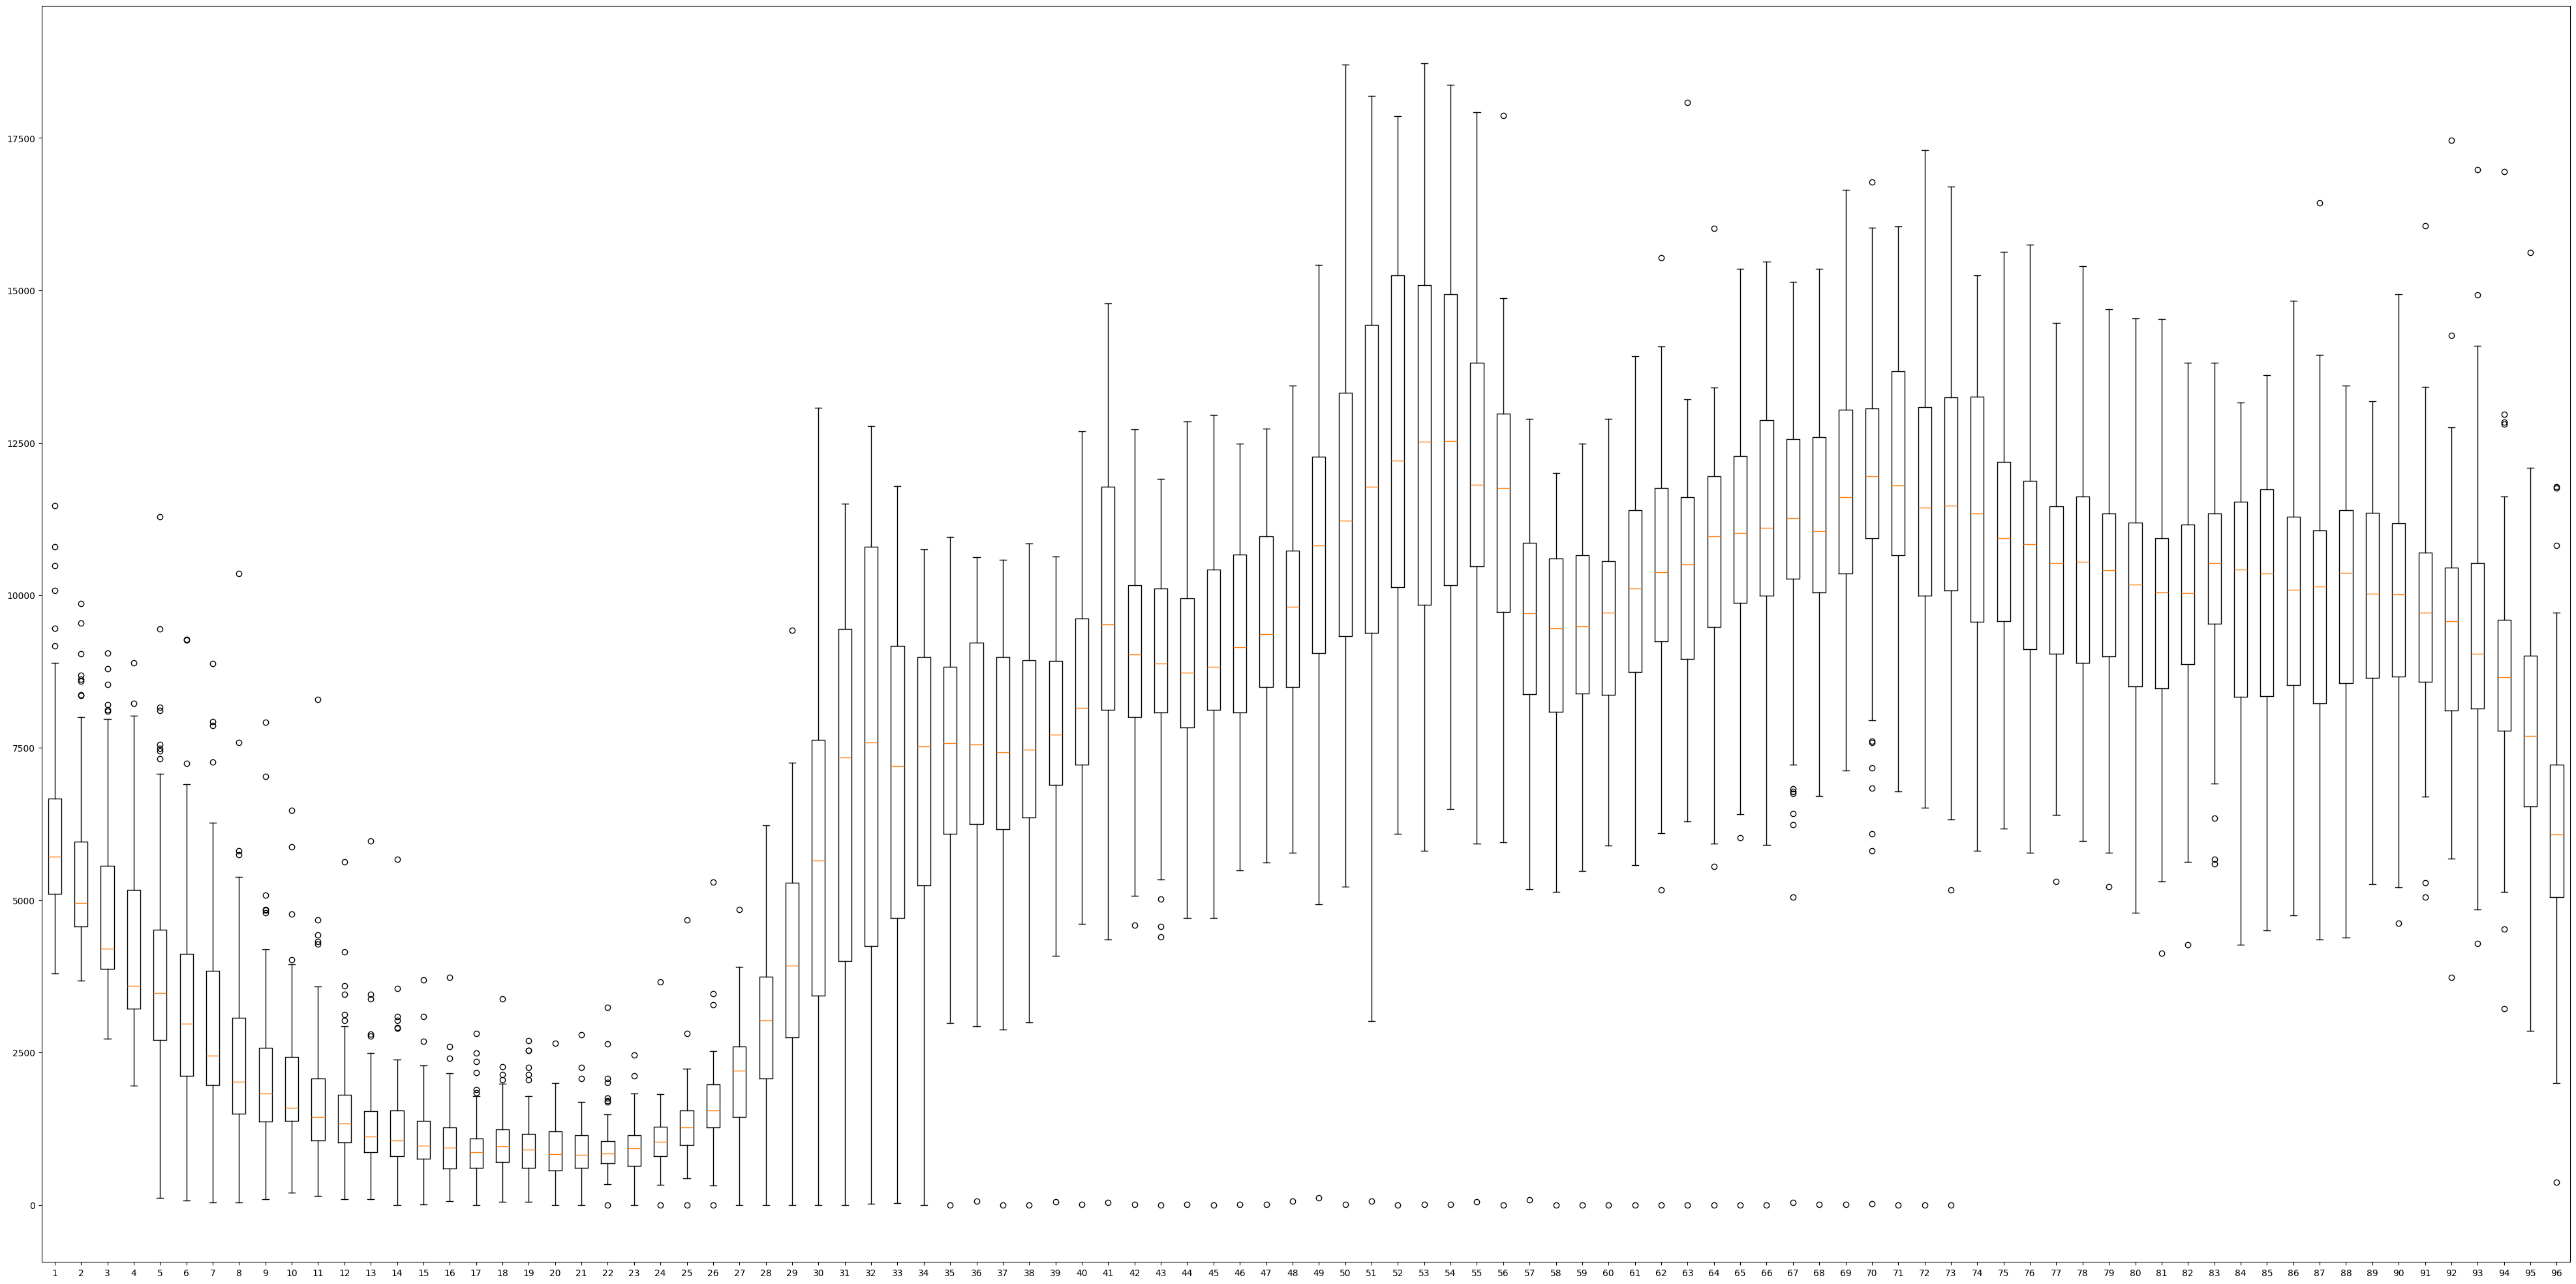

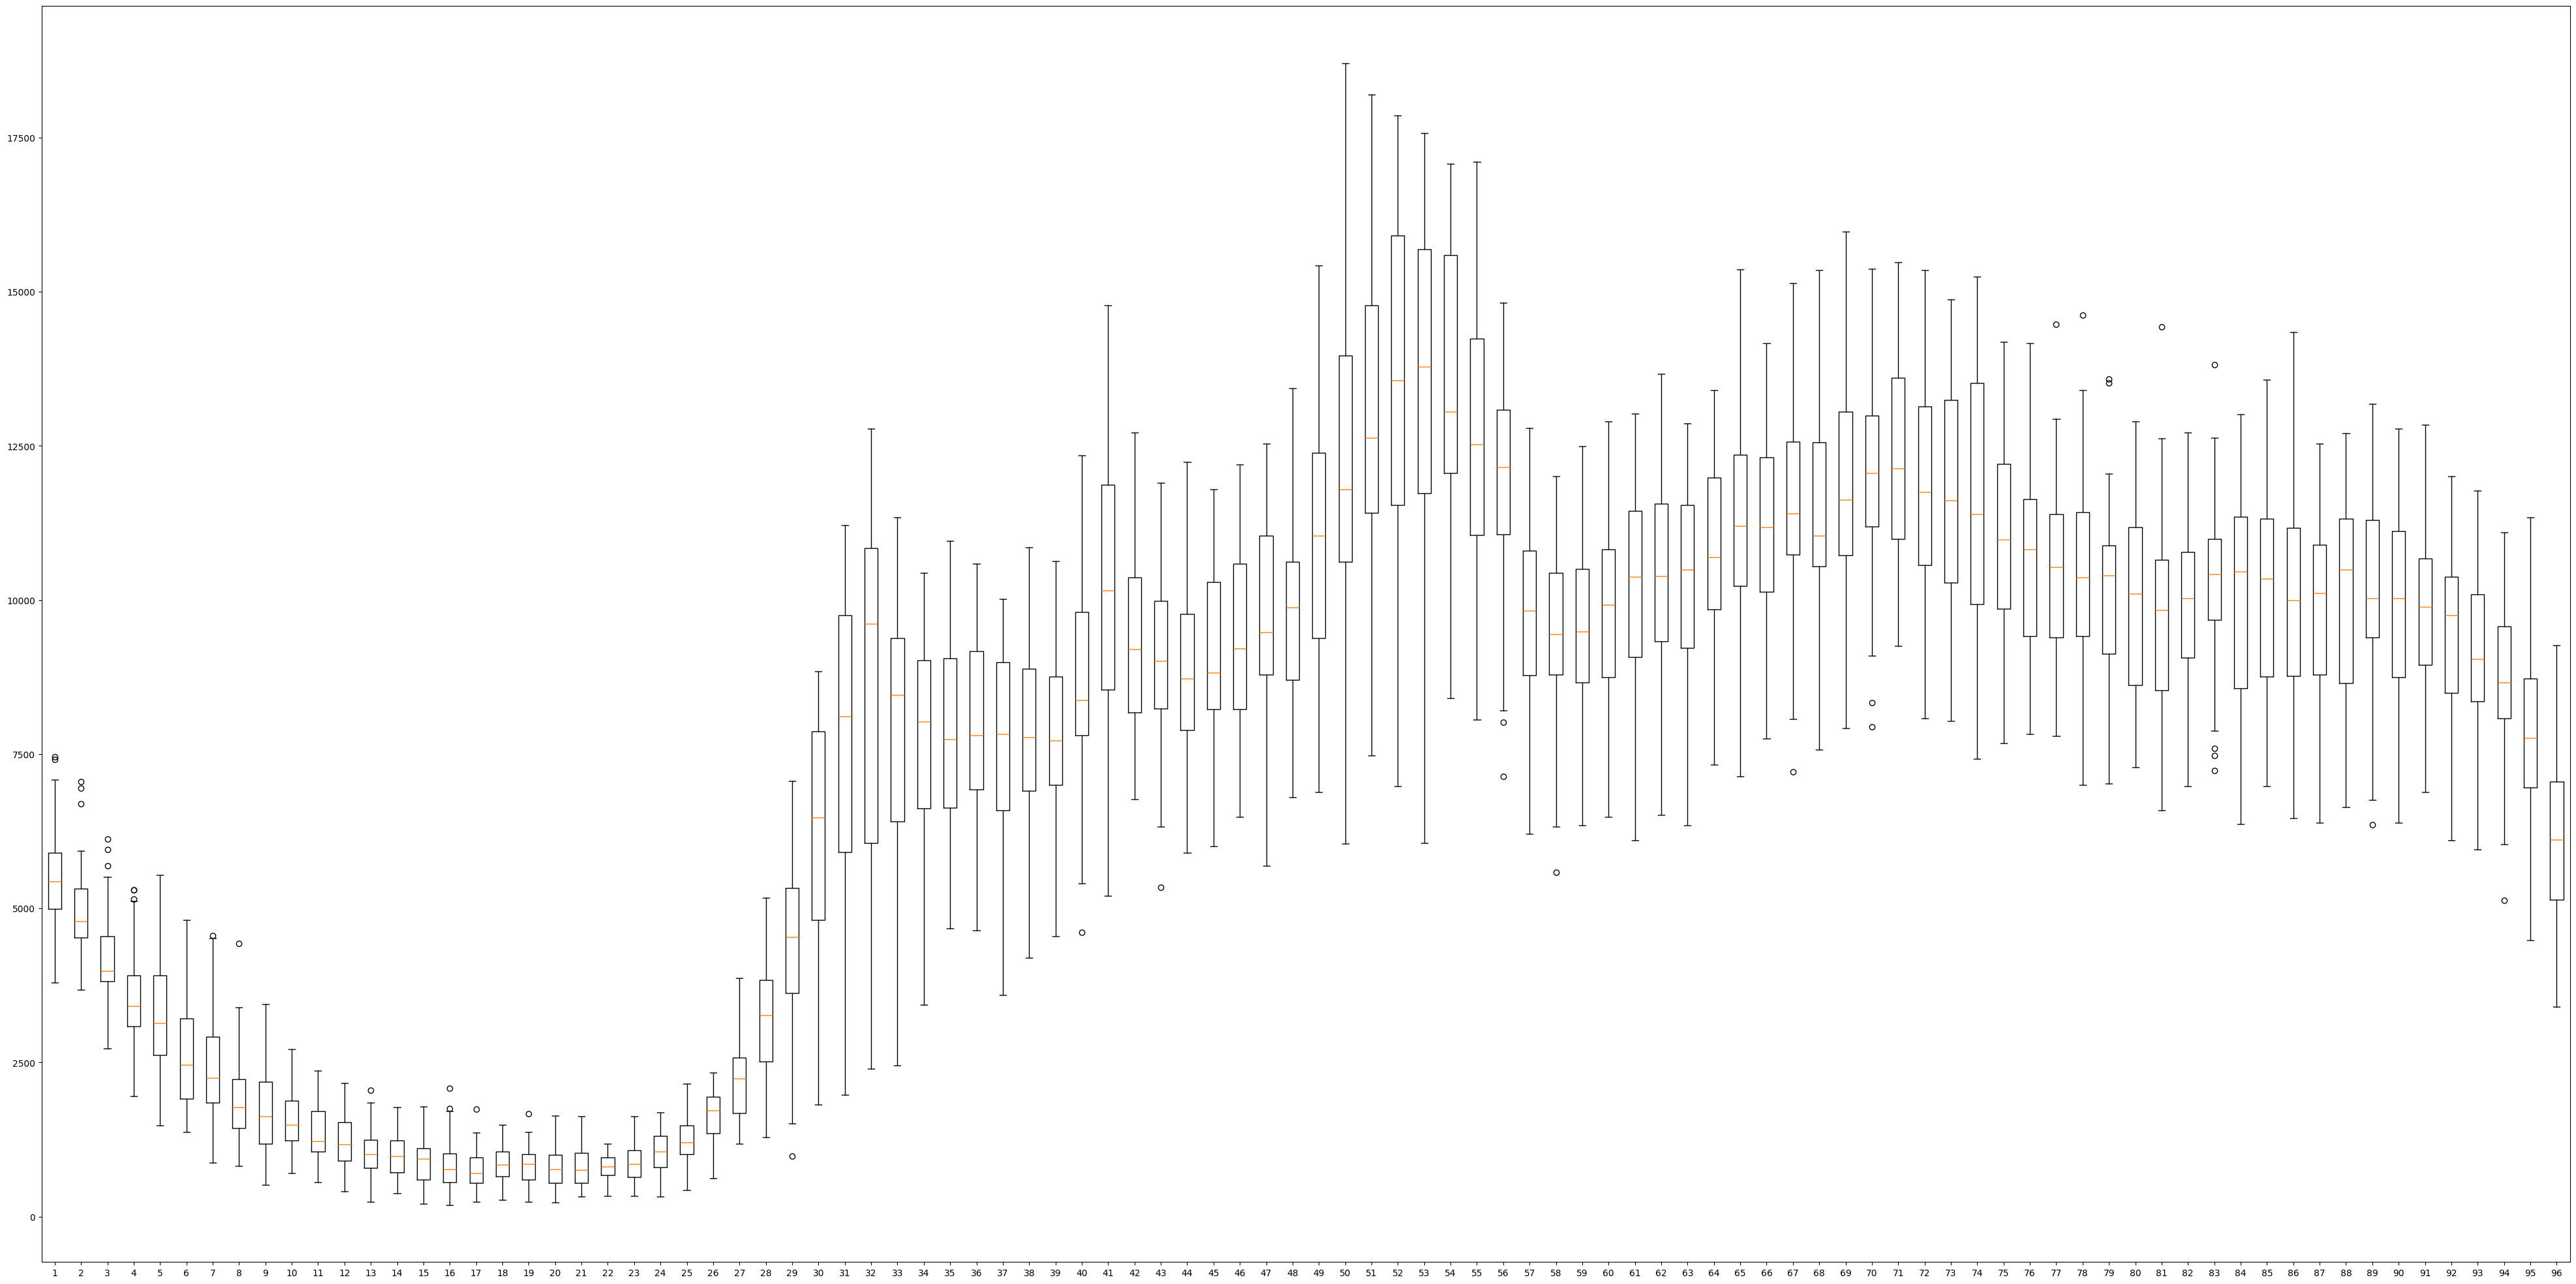

In [18]:
fig1 = plt.figure(figsize =(50, 25))
plt.boxplot(df)
plt.show()

fig2 = plt.figure(figsize =(50, 25))
plt.boxplot(df_after_rm_outliers)
plt.show()

# ------------------------------------------------------------------------------------------

In [19]:
df_after_rm_outliers.reset_index(drop=False, inplace=True)

In [20]:
df_outliers.reset_index(drop=False, inplace=True)

In [21]:
df_outliers

day         00:00        00:15        00:30        00:45  \
0   20190505   7942.450836  7798.051231  7418.901374  6874.945233   
1   20190331     8886.1369  7998.733758   8792.79102  7730.643881   
2   20190425   4922.675826  4530.271901  3721.973156  3136.048662   
3   20190414    9168.80621  8627.011169  8206.984065  7848.248557   
4   20190407   8802.002085  8364.257753  7971.483264  7582.022972   
5   20190518   7868.818683  6686.136118  6111.574593  5894.304665   
6   20190511   6473.697494  5903.273279  5506.186306  5219.421609   
7   20190324  11467.796865  8350.598124  7810.513273  8021.938196   
8   20190323   5879.411743  5105.018057  5829.296437  5619.412897   
9   20190517   6751.857366  6292.570833  5457.723519  4430.751889   
10  20190528    5425.50847  4607.483302  3943.885997  3404.573811   
11  20190521   5049.902826   4287.05581  3620.334711  3044.213374   
12  20190526   9461.073309   8585.32101  8101.200007  7648.655274   
13  20190519  10079.481626  9038.521538   8535.46234  8225.422726   
14  20190531    5532.60583  5481.004468  4940.996537  4019.771622   
15  20190530   5156.304628  4761.087866  4141.407163  3608.500205   
16  20190501   5810.890242  4936.365836  4272.449682  3601.672624   
17  20190420   6646.432071  6323.926431  6176.405265  6257.657992   
18  20190427   6263.413716   5687.59898  5298.073309  4980.456905   
19  20190421  10481.637477   9539.90357  9054.435534  8887.841617   
20  20190428   7178.336982  7528.093265  7329.135113  6845.024573   
21  20190512   6293.212741  6524.555568   6161.12681  5351.078931   
22  20190317   7948.133251  8687.718679  7191.509438  6780.473361   
23  20190514   4289.149447  4008.967199  3529.717004  3000.477829   
24  20190525   6099.934138  6025.125656  5802.762128   5689.15492   
25  20190329  10796.719722  9865.305112  8115.237202  6059.544845   

           01:00        01:15        01:30         01:45        02:00  ...  \
0    4650.025727  4613.171153  5106.989948   4005.257269  4196.979299  ...   
1    5456.785212  5602.346327   5143.69567   4963.492163  4119.096281  ...   
2     2252.57463  2015.866004  1489.856435   1241.948844   1260.86552  ...   
3    8104.023009  6083.219442  6077.452362   5314.203284  3667.635765  ...   
4    7448.208869  5208.911799  4694.337168    4623.86902  4795.323057  ...   
5    6662.371645  6804.314494   6272.52716   5376.103168  4846.034588  ...   
6    4471.165531  3827.346141  2967.384415   3077.317026  2215.886332  ...   
7    7069.637105  5555.699691  5242.606687   5741.352172  4831.099147  ...   
8     4196.04222  3819.249302  2902.281582    2950.47835  1940.061618  ...   
9    3326.512901   3408.95253  2379.789642   3189.056852  2573.064224  ...   
10   3474.054097  2759.860121   2247.61283   2059.111359  1948.475632  ...   
11   2725.075431  2666.838527  2355.171079   1462.393053  1334.203582  ...   
12   7547.701739  7241.794855   7925.59548   5314.798578  5084.052906  ...   
13   9447.305224  9272.299267  7862.420939   7589.530623  7029.864738  ...   
14   2149.998771   2071.91124  1786.875721   1986.683793   1702.59481  ...   
15   3411.992554  2820.129603  2521.737369   1631.692989  1703.299602  ...   
16   3695.490078  3599.290778   2888.36807   2984.902305  1691.700771  ...   
17   8161.137123  6898.467516  7262.932723   5803.143341  4130.486317  ...   
18   3475.185003  3419.166313  3195.443017   2277.402919  1689.281209  ...   
19  11286.147064  9264.045199  8876.574928  10358.431364  7916.171004  ...   
20   4405.725306  4574.722365   4852.10462   3741.128523  3381.091701  ...   
21    110.232027    74.370751    42.268923     43.513683    94.744667  ...   
22   7489.202465  6060.874344  6044.165122   5148.476488  3989.901709  ...   
23    2599.89013  2125.419487  1689.288991   1212.765814  1897.793738  ...   
24   6125.424215  4784.487509  4906.360885   3916.495476  3407.095648  ...   
25   7320.196433  5007.805615  4927.804535   3758.995346  2483.559924  ...   

           21:30         21:45        

In [22]:
#dictionary to group all days by its name
dictonary_of_days = dict()

In [23]:
for day in df_after_rm_outliers['day'].tolist():
    d = datetime.datetime.strptime(day, '%Y%m%d')
    if d.strftime('%A') in dictonary_of_days:
        dictonary_of_days[d.strftime('%A')].append(day)
    else:
        dictonary_of_days[d.strftime('%A')] = []
        dictonary_of_days[d.strftime('%A')].append(day)

In [24]:
#create directory for each day_name
for day in dictonary_of_days.keys():
    path = f"./dataset/{city_str}/{app_str}/all_days_in_csv/"
    os.makedirs(path+day)

In [25]:
# group the days by its name each one in its directory
for day in dictonary_of_days.keys():
    for d in dictonary_of_days[day]:
            source = f"./dataset/{city_str}/{app_str}/all_days_in_csv/"
            source += d + ".csv"
            destination = f"./dataset/{city_str}/{app_str}/all_days_in_csv/"
            destination = destination + day
            shutil.move(source, destination)

In [26]:
os.makedirs(path+"outliers")

In [27]:
for file in df_outliers['day'].tolist():
    source = f"./dataset/{city_str}/{app_str}/all_days_in_csv/"
    destination = source + "/outliers"
    source += file+".csv"
    shutil.move(source, destination)

In [28]:
l_out= []

In [29]:
day = datetime.datetime.strptime('20190317', '%Y%m%d')
times = [day + datetime.timedelta(minutes=15*i) for i in range(96)]
times_str = [t.strftime('%H:%M') for t in times]

In [30]:
# here is grouping all of the excel values for each day under its name 
# ex: group all the saturdays in one saturday.csv file storing the av value for each hour
for day_title in dictonary_of_days.keys():
    path = f"./dataset/{city_str}/{app_str}/" + "all_days_in_csv/" + day_title +"/"
    list_of_d = []
    for curr_day in dictonary_of_days[day_title]:
        curr_path = path + "/" + f"{curr_day}.csv"
        df = pd.read_csv(curr_path)
        list_of_d.append(df)
    merged_df = pd.concat(list_of_d).groupby('tile_id').mean()
    l_out.append(merged_df)
    merged_df.to_csv(path+day_title+'.csv')

In [31]:
# makeing all dfs without indexes 
for d in l_out:
    d.reset_index(inplace = True);

# Load data of weeks

In [32]:
list_df_days = []

In [33]:
days_names = ['Friday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday']

In [34]:
path_o = f'./dataset/{city_str}/{app_str}/all_days_in_csv/'

In [35]:
for day_name in days_names:
    file_path = path_o + day_name + "/" + day_name + ".csv"
    df = pd.read_csv(file_path)
    list_df_days.append(df)

In [36]:
start_time = pd.Timestamp('00:00:00')
end_time = pd.Timestamp('23:59:59')
time_intervals = pd.date_range(start=start_time, end=end_time, freq='15T')
times_str = [time.strftime('%H:%M') for time in time_intervals]

/var/folders/19/85js5jqn52q28jzy8r3bk3tr0000gn/T/ipykernel_49801/962735573.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_intervals = pd.date_range(start=start_time, end=end_time, freq='15T')


In [37]:
merged_df_ = pd.concat(list_df_days).groupby('tile_id').mean()
merged_df_.to_csv(path_o+"all_days.csv")

# ------------------------------------------------------------------------------------------

# Clustering tiles using average daily traffic

In [38]:
path = f'./dataset/{city_str}/{app_str}/all_days_in_csv/'

In [39]:
df = pd.read_csv(path+"all_days.csv")

In [40]:
df_places = gpd.read_file('./dataset/'+'Mans.geojson')

In [41]:
merged_with_shapes = df_places.merge(df, on='tile_id')

In [42]:
avg_list = []

In [43]:
for index, row in merged_with_shapes.iterrows():
    avg_list.append(sum(row[2:len(row)])/96)

In [44]:
merged_with_shapes['avg_traffic'] = avg_list

In [45]:
g1 = np.percentile(avg_list, 20)
g2 = np.percentile(avg_list, 40)
g3 = np.percentile(avg_list, 60)
g4 = np.percentile(avg_list, 80)

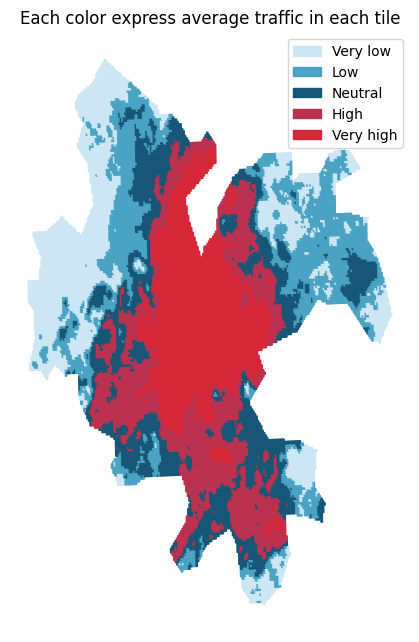

In [46]:
fig = plt.figure(figsize=(4, 6))
ax = fig.add_axes([0, 0, 1, 1])
colors = ['#CCE6F4','#4BA3C3','#175676','#BA324F','#D62839']
i = 0

plt.title('Each color express average traffic in each tile')

for index, row in merged_with_shapes.iterrows():
    coordinates = row['geometry']
    polygon = Polygon(coordinates)
    if row['avg_traffic'] > g4:
        ax.fill(*polygon.exterior.xy, color=colors[4])
    elif row['avg_traffic'] > g3:
        ax.fill(*polygon.exterior.xy, color=colors[3])
    elif row['avg_traffic'] > g2:
        ax.fill(*polygon.exterior.xy, color=colors[2])
    elif row['avg_traffic'] > g1:
        ax.fill(*polygon.exterior.xy, color=colors[1])
    else:
        ax.fill(*polygon.exterior.xy, color=colors[0])


plt.autoscale(True)
plt.axis('off')
patch1 = mpatches.Patch(color='#CCE6F4', label='Very low')
patch2 = mpatches.Patch(color='#4BA3C3', label='Low')
patch3 = mpatches.Patch(color='#175676', label='Neutral')
patch4 = mpatches.Patch(color='#BA324F', label='High')
patch5 = mpatches.Patch(color='#D62839', label='Very high')

plt.legend(handles=[patch1, patch2,patch3,patch4,patch5])

plt.show()

Fit 1 clusters
Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters


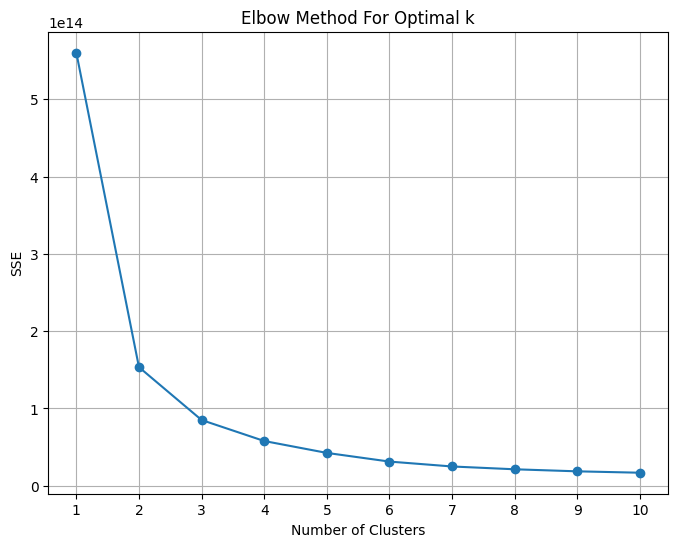

In [47]:
df_int = merged_with_shapes.select_dtypes(include='int64').dropna()
df_float = merged_with_shapes.select_dtypes(include='float64').dropna()

result = pd.merge(left=df_int, right=df_float, left_index=True, right_index=True)

def find_optimal_clusters(data, max_k):
    iters = range(1, max_k + 1)
    sse = []
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        print(f'Fit {k} clusters')

    plt.figure(figsize=(8, 6))
    plt.plot(iters, sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.title('Elbow Method For Optimal k')
    plt.xticks(iters)
    plt.grid(True)
    plt.show()


find_optimal_clusters(result, 10)

In [48]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(result)
merged_with_shapes['Segmentation'] = kmeans.labels_

(np.float64(0.019877963031669256),
 np.float64(0.3817383511888313),
 np.float64(47.883858430126175),
 np.float64(48.10659195625816))

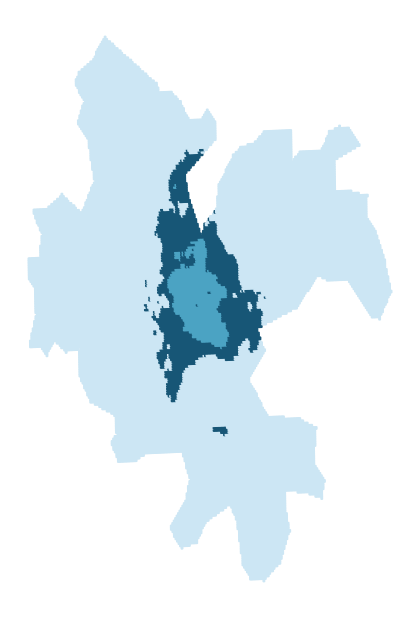

In [49]:
fig = plt.figure(figsize=(4, 6))
ax = fig.add_axes([0, 0, 1, 1])
colors = ['#CCE6F4','#4BA3C3','#175676','#BA324F','#D62839']
i = 0

for index, row in merged_with_shapes.iterrows():
    coordinates = row['geometry']
    polygon = Polygon(coordinates)
    ax.fill(*polygon.exterior.xy, color=colors[row['Segmentation']])


plt.autoscale(True)
plt.axis('off')



# Get day's average traffic per hour

In [50]:
def aggregate_columns(df, agg_func=np.sum):
    n = 4
    new_columns = []

    for i in range(0, df.shape[1], n):
        cols = df.iloc[:, i:i+n]
        new_col = cols.apply(agg_func, axis=1)
        start_time = cols.columns[0][:2]
        end_time = cols.columns[min(n-1, len(cols.columns)-1)][:2]
        new_col_name = f"{start_time}:00 - {end_time}:45"
        new_columns.append(new_col.rename(new_col_name))

    return pd.concat(new_columns, axis=1)

In [51]:
aggregated_data = {}

In [52]:
for day in days_names:
    file_path = f'./dataset/{city_str}/{app_str}/all_days_in_csv/{day}/{day}.csv'
    df = pd.read_csv(file_path)
    if 'tile_id' in df.columns:
        df.drop('tile_id', axis = 1 , inplace=True)
    
    df_aggregated = aggregate_columns(df, agg_func=np.sum)
    aggregated_data[day] = df_aggregated

In [53]:
aggregated_data_mean = {}

In [54]:
for day in days_names:
    df = aggregated_data[day]
    mean_values = df.mean(axis=0)
    mean_df = pd.DataFrame(mean_values).transpose()
    aggregated_data_mean[day] = mean_df

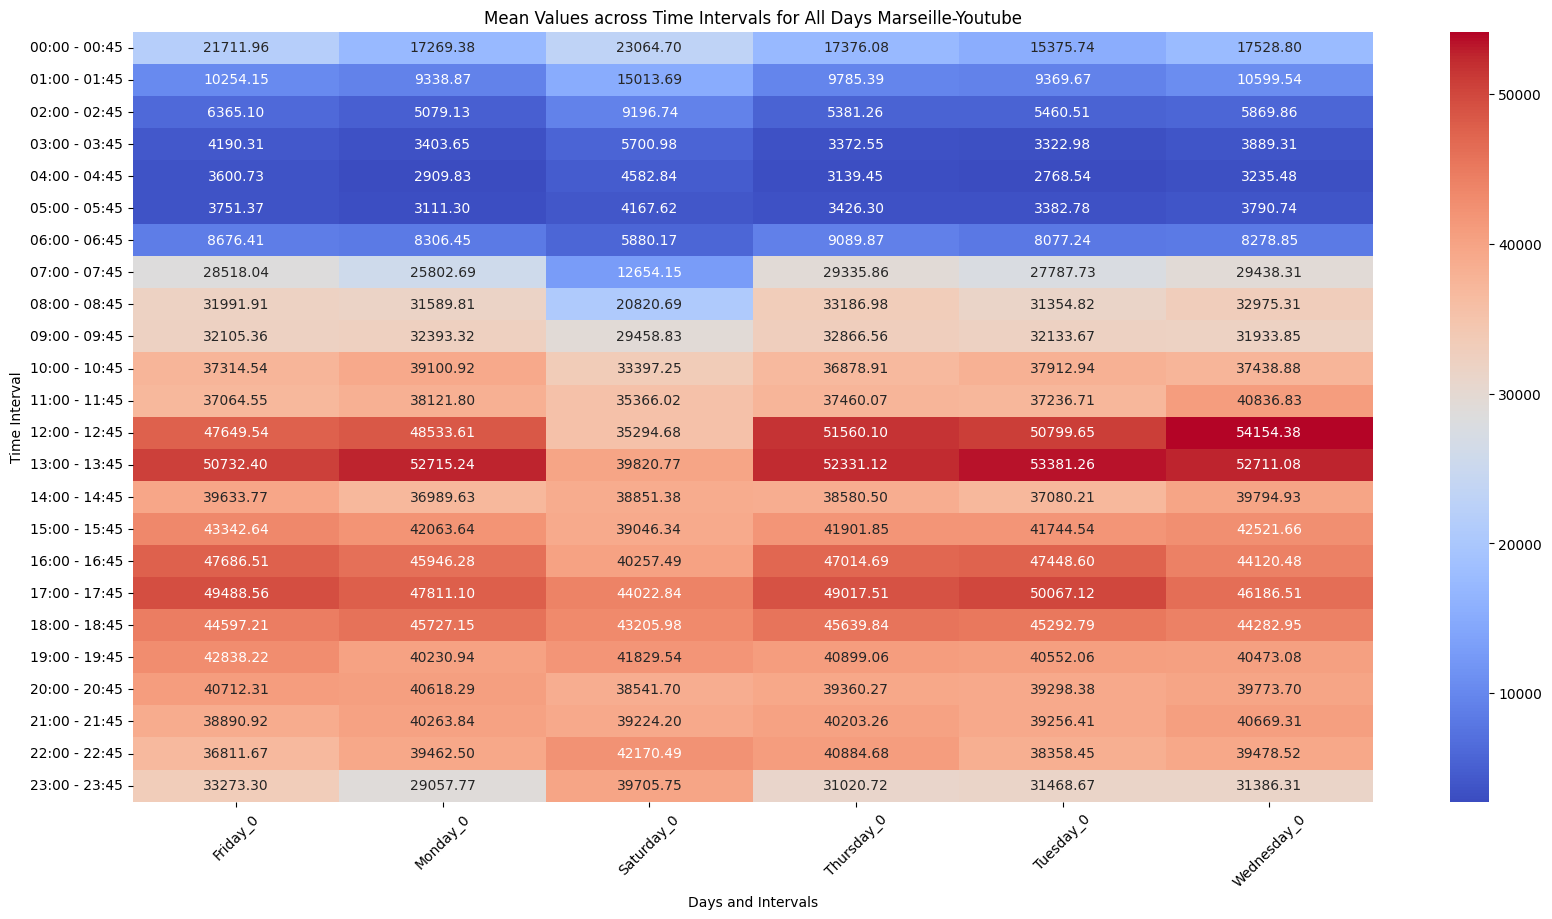

In [55]:
frames = []

for day in days_names:
    mean_df = aggregated_data_mean[day].transpose()
    mean_df.columns = [day + '_' + str(col) for col in mean_df.columns] 
    frames.append(mean_df)

combined_df = pd.concat(frames, axis=1)
plt.figure(figsize=(20, 10))
sns.heatmap(combined_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Mean Values across Time Intervals for All Days Marseille-Youtube')
plt.ylabel('Time Interval')
plt.xlabel('Days and Intervals')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [66]:
import pandas as pd

mean_values = combined_df.mean(axis=0).to_frame(name='Mean Value')
mean_values.index.name = 'Day'

print("Mean Values Across Time Intervals for All Days - Mans-Instagram\n")
print(mean_values)

Mean Values Across Time Intervals for All Days - Mans-Instagram

               Mean Value
Day                      
Friday_0     30883.395241
Monday_0     30243.630976
Saturday_0   28386.450927
Thursday_0   30821.369772
Tuesday_0    30372.145314
Wednesday_0  30890.361717


# Matrix Representation

In [57]:
# fetch the number of rows and columns of the city
n_rows, n_cols = city_dims[city_str]

# create a 3D array to store the traffic values
# the first dimension is the time, the second and third are the rows and columns (spatial dimensions)
city_traffic = np.zeros((len(times_str), n_rows, n_cols))

# fill the array with the traffic values
for _, row in df_day.iterrows():
    tile_id = row['tile_id']
    row_index = int(tile_id // n_cols)
    col_index = int(tile_id % n_cols)

    traffic_values = np.array(row[times_str])
    city_traffic[:, row_index, col_index] = traffic_values

# Traffic Map

/var/folders/19/85js5jqn52q28jzy8r3bk3tr0000gn/T/ipykernel_49801/780326874.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_traffic = cm.get_cmap('Spectral_r').copy()


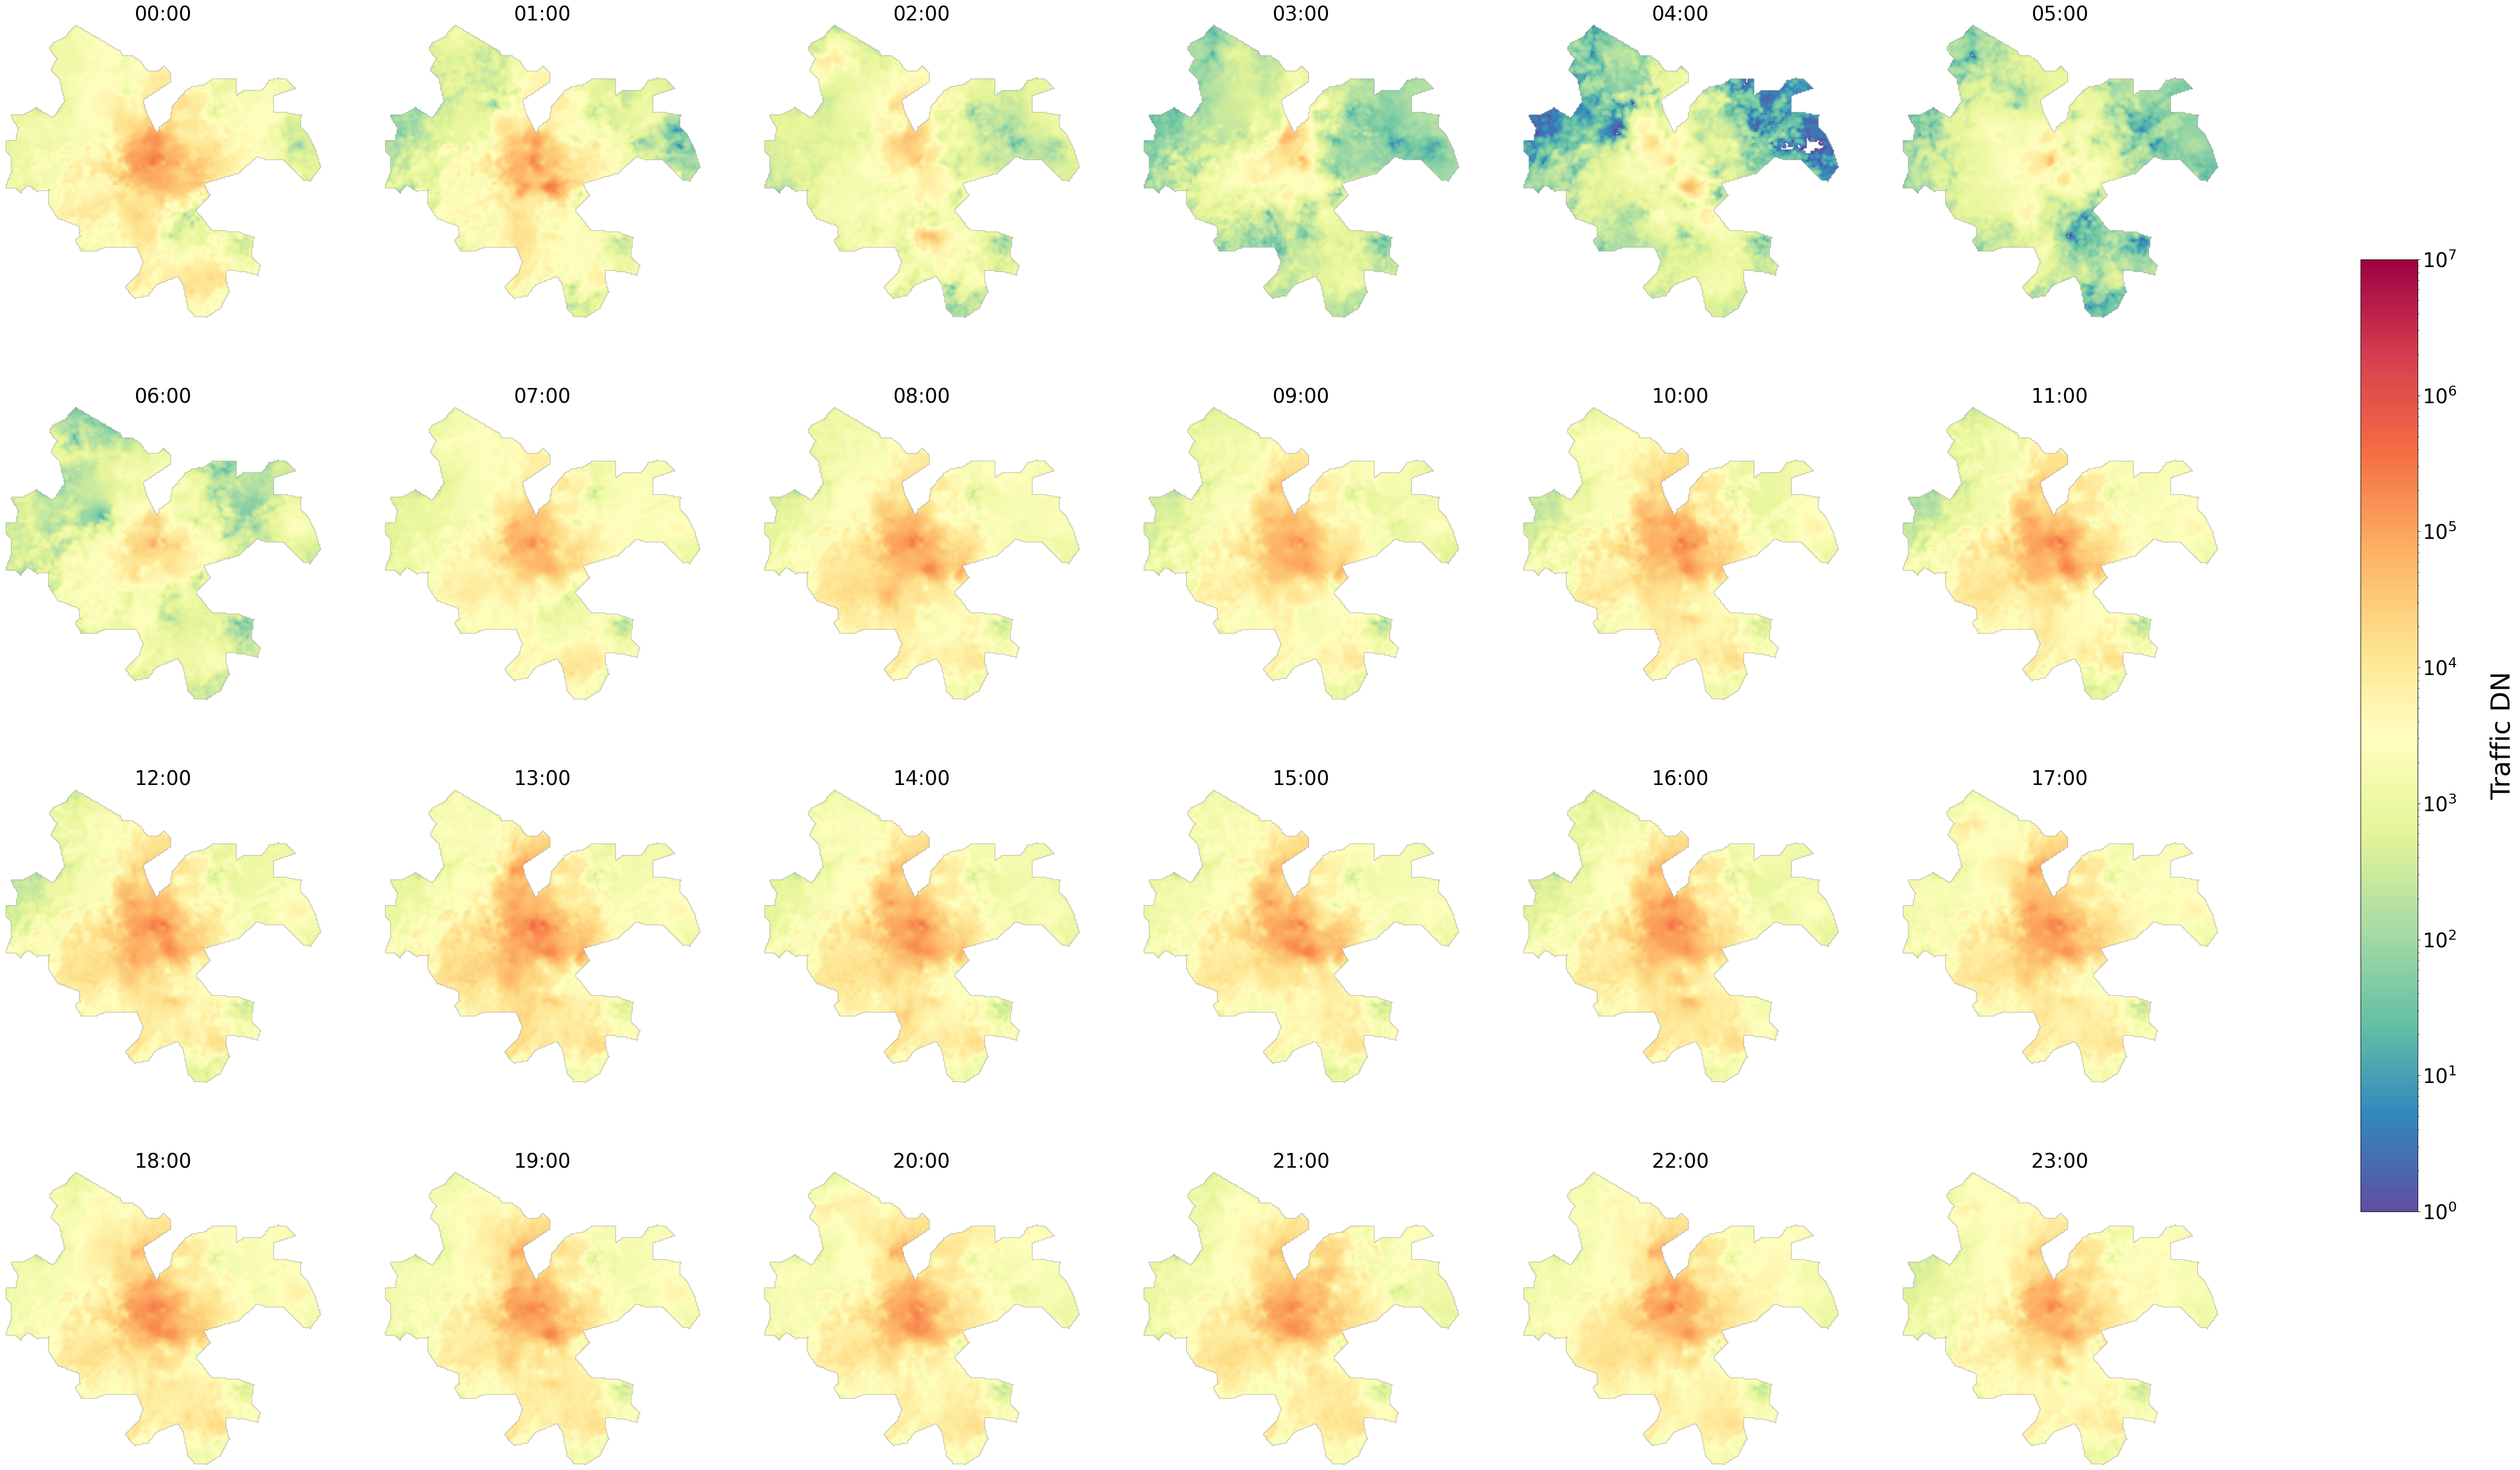

In [58]:
cmap_traffic = cm.get_cmap('Spectral_r').copy()
cmap_traffic.set_under('w', 0)
norm_traffic = colrs.LogNorm(vmin=1e0, vmax=1e7)

# let's plot the traffic map of the city for the first 15 min of each hour
fig, axs = plt.subplots(4, 6, figsize=(60, 40))
axs = axs.flatten()

for hour in range(24):
    ax = axs[hour]

    #recall that we have 15 min intervals, so we need to multiply the hour by 4
    city_traffic_time = city_traffic[ hour * 4 ] 

    ax.imshow(city_traffic_time, origin='lower', cmap=cmap_traffic, norm=norm_traffic)
    ax.set_title(f'{str(hour).zfill(2)}:00', fontsize=30)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

ax = fig.add_axes([0.95, 0.25, 0.02, .5])
sm = plt.cm.ScalarMappable(cmap=cmap_traffic, norm=norm_traffic)
sm.set_array([])
clb = plt.colorbar(sm, cax=ax, orientation='vertical') 
clb.set_label('Traffic DN', rotation=90, fontsize=40, labelpad=50)
clb.ax.tick_params(labelsize=30)
clb.ax.xaxis.set_ticks_position('default')

plt.show()

# Total traffic time series

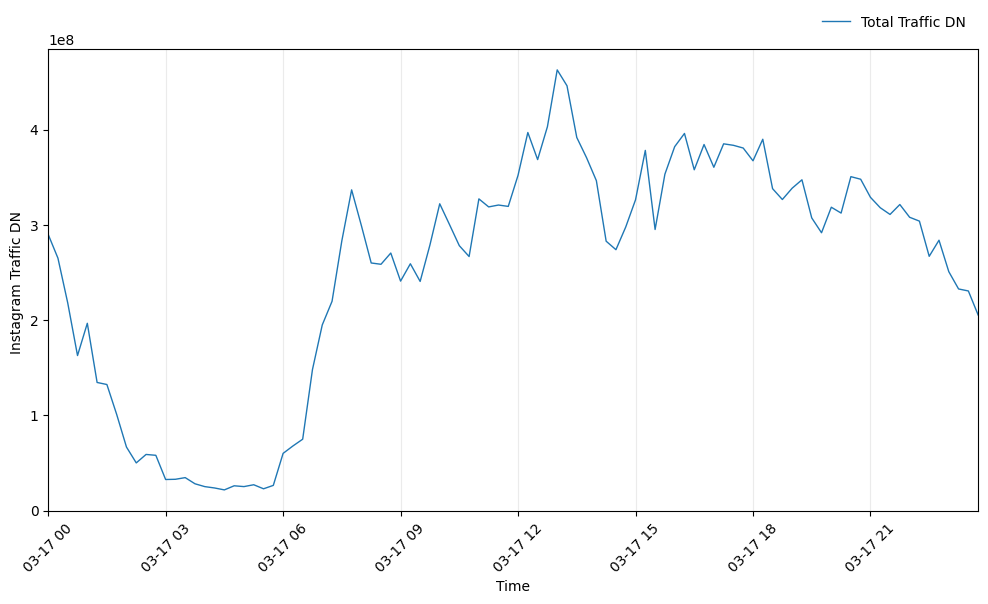

In [59]:
traffic_time_series = city_traffic.sum(axis=(1, 2))

fig = plt.figure(figsize=(12, 6))
plt.plot(times, traffic_time_series, linewidth=1, color='tab:blue', label='Total Traffic DN')
plt.xlabel('Time')
plt.ylabel(f'{app_str} Traffic DN ')
plt.xticks(rotation=45)
plt.grid(axis='x', alpha=0.25)
plt.xlim(times[0], times[-1])
plt.legend(loc='upper right',
            ncol=1,
            bbox_to_anchor=(1, 1.1), 
            fancybox=False, 
            frameon=False)
plt.show()

# Traffic time series for specific tile

Selected non-zero tiles: [(np.int64(125), np.int64(132)), (np.int64(59), np.int64(125)), (np.int64(145), np.int64(179)), (np.int64(49), np.int64(170))]


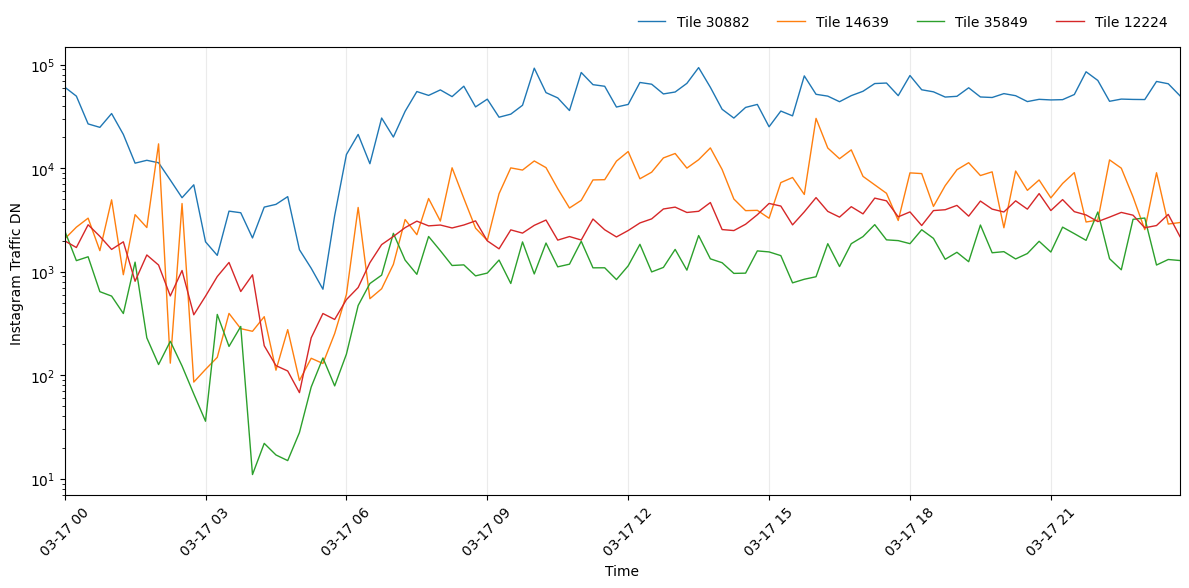

In [60]:
# Find all tile positions with any non-zero traffic
non_zero_tiles = np.argwhere(np.any(city_traffic > 0, axis=0))

# Pick a few random ones
np.random.seed(42)
random_indices = np.random.choice(len(non_zero_tiles), size=4, replace=False)
random_tiles = [tuple(non_zero_tiles[i]) for i in random_indices]

print("Selected non-zero tiles:", random_tiles)


plt.figure(figsize=(12, 6))

for random_tile in random_tiles:
    row, col = random_tile
    traffic_tile = city_traffic[:, row, col]
    
    if np.all(traffic_tile == 0):
        print(f"Tile ({row}, {col}) has all-zero traffic — skipping.")
        continue

    tile_id = row * n_cols + col
    plt.plot(times, traffic_tile, linewidth=1, label=f'Tile {tile_id}')

plt.xlabel('Time')
plt.ylabel(f'{app_str} Traffic DN ')
plt.xticks(rotation=45)
plt.grid(axis='x', alpha=0.25)
plt.xlim(times[0], times[-1])
plt.legend(loc='upper right',
            ncol=4,
            bbox_to_anchor=(1, 1.1), 
            fancybox=False, 
            frameon=False)
plt.yscale('log')
plt.tight_layout()
plt.show()


# Avoid tiles outside Marseille

In [61]:
# let's load the geojson file of the city
city_geojson_file = f'./dataset/{city_str}.geojson'
fd = open(city_geojson_file)
city_geojson = json.load(fd)
fd.close()

# showing one of the features
city_geojson['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[0.24890485220422026, 47.89398268131399],
    [0.24886932675779921, 47.894881678568],
    [0.25020607753228485, 47.8949055630573],
    [0.2502415802605459, 47.89400656540794],
    [0.24890485220422026, 47.89398268131399]]]},
 'properties': {'tile_id': 156}}

In [62]:
# we can use the tile_id to find the row and column index of the tile
# and most important only valid tiles are present in the geojson file
tile_id = city_geojson['features'][0]['properties']['tile_id']

row_index = int(tile_id // n_cols)
col_index = int(tile_id % n_cols)
print(f'row_index: {row_index}, col_index: {col_index}')

row_index: 0, col_index: 156


In [63]:
# let's create a mask of the city, where the value 1 indicates a valid tile and 0 an invalid tile
city_mask = np.zeros((n_rows, n_cols))

for feature in city_geojson['features']:
    tile_id = feature['properties']['tile_id']
    row_index = int(tile_id // n_cols)
    col_index = int(tile_id % n_cols)
    city_mask[row_index, col_index] = 1

# Plot the mask

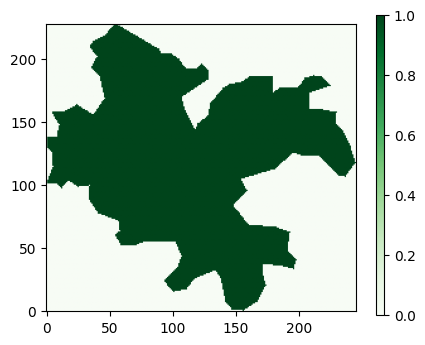

In [64]:
fig = plt.figure(figsize=(4, 6))
plt.imshow(city_mask, origin='lower', cmap='Greens')

cax = fig.add_axes([0.95, 0.25, 0.02, .5])
plt.colorbar(cax=cax)

plt.show()

# Mean and Median traffic

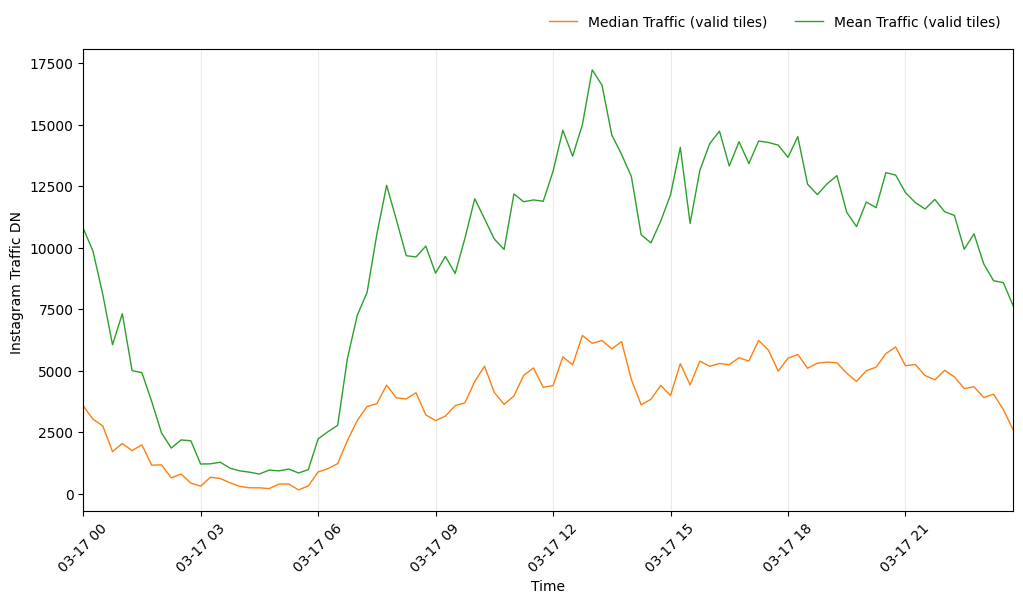

In [65]:
median_traffic = [np.median(city_traffic[time_index][city_mask == 1]) for time_index in range(len(times_str))]
mean_traffic = [np.mean(city_traffic[time_index][city_mask == 1]) for time_index in range(len(times_str))]

fig = plt.figure(figsize=(12, 6))
plt.plot(times, median_traffic, linewidth=1, color='tab:orange', label='Median Traffic (valid tiles)')
plt.plot(times, mean_traffic, linewidth=1, color='tab:green', label='Mean Traffic (valid tiles)')

plt.xlabel('Time')
plt.ylabel(f'{app_str} Traffic DN ')
plt.xticks(rotation=45)
plt.grid(axis='x', alpha=0.25)
plt.xlim(times[0], times[-1])
plt.legend(loc='upper right',
            ncol=3,
            bbox_to_anchor=(1, 1.1), 
            fancybox=False, 
            frameon=False)
plt.show()